<h1> EXERCICE I - Analysis electricity consumption </h1>

In [1]:
import sys
import urllib
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import autopep8
#import seaborn as sns
from os import path
from sklearn import preprocessing
%matplotlib inline


In [2]:
# download part if needed.
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
url = u'http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename
# testing existence of file:
if sys.version_info >= (3, 0):
    if not(path.isfile('zipfilename')):
        urllib.request.urlretrieve(Location, zipfilename)
else:
    if not(path.isfile('zipfilename')):
        urllib.urlretrieve(Location, zipfilename)
# unzip part
zip = zipfile.ZipFile(zipfilename)
zip.extractall()
# Detect and count lines with missing values.
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power', 'Sub_metering_1']
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
                 na_values=na_values, usecols=fields)


<h3> Question 1_1 : Clean Data </h3>

Count the number of rows where `Global_active_poweror`, `Sub_metering_1` are missing (represented
by a "nan"). Remove these rows.

In [3]:
df.isnull().sum()


Date                      0
Time                      0
Global_active_power    3732
Sub_metering_1         3732
dtype: int64

In [4]:
df = df.dropna(how='any')


<h3> Question 1_2 : Scaling </h3>

Read the "Attribute Information" in https://archive.ics.uci.edu/ml/datasets/individual+ household+electric+power+consumption. Now scale the variable `Sub_metering_1` to have the same unit as `Global_active_power`.

We need to scale `Sub_metering_1`,in watt-hour  to the unit of `Global_active_power`, in kilowatt. For that we need to divide each value of sub_metering_1 by one thousand.

In [5]:
# solution 1 df.loc[:,'Sub_metering_1'] /= 1000
# solution 2 df['Sub_metering_1'] = df['Sub_metering_1'].apply(lambda x: x/1000)
df['Sub_metering_1'] = df['Sub_metering_1'].apply(lambda x: (x*60)/1000)


<h3> Question 1_3: Sort by datetime </h3>

Use `to_datetime` and `set_index` to create a Time Series (beware of the international dates format that is di erent from the French standard) and index your dataframe by timestamps.

In [6]:
df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'],
                                 format='%d/%m/%Y %H:%M:%S')
df = df.set_index('Timestamp')

<h3> Question 1_4: Display </h3>

 Display the graphic of daily averages, between `January 1 2007` and `April 30 2007`, with the variables `Global_active_power` and `Sub_metering_1` on a same  gure. Propose an explanation for the consumption behavior between `February 2` and `March 3` ? between `April 10` and `April 15` ?

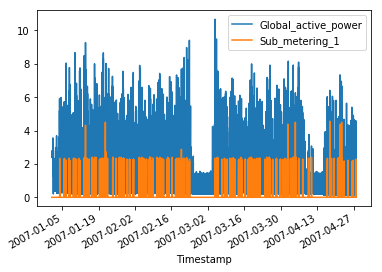

In [7]:
# Between January 1 2007 and  April 30 2007
df.loc["2007-01-01 00:00:00":
       "2007-04-30 00:00:00", :].plot(legend=True)


I guess that Between `February 2` and `March 3` ? between `April 10` and `April 15`, people are in vacation and therefore they are not using the kitchen ( sub_metering_1 is corresponding to the kitchen ).

<h3> Question 1_5: Display a barplot by weekdays </h3>

Display a barplot of the `Sub_metering_1` by weekdays. Interpret the evolution of consumption throughout the week.


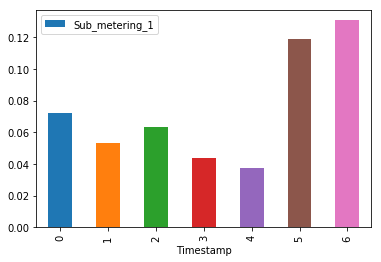

In [8]:
df = df.reset_index()
df_bar = df.groupby(df['Timestamp'].dt.dayofweek).mean()
df_bar.loc[:, "Sub_metering_1"].plot(kind='bar',legend=True)


We can interpret that in the weekend people use more the kitchen. 

<h3> Question 1_6: Load new file </h3>


Load the dataset with pandas, and keep only the DATE and TG columns.
Divide by 10 the TG column to get Celsius temperature.
Treat missing values as NaNs.



In [9]:
# download part if needed.
url = u'http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/'
filename = 'TG_STAID011249.txt'
Location = url + filename
# testing existence of file:
if sys.version_info >= (3, 0):
    if not(path.isfile('filename')):
        urllib.request.urlretrieve(Location, filename)
else:
    if not(path.isfile('filename')):
        urllib.urlretrieve(Location, filename)

# Detect and count lines with missing values.
na_values = ['-9999']
df2 = pd.read_csv(filename, sep=',', nrows=200000,
                  na_values=na_values, header=20, usecols=[2, 3],
                  names=["DATE", "TG"])
# Removing NaN
df2 = df2.dropna(how='any')
# Divide by 10 the TG column 
df2['TG'] = df2['TG'].apply(lambda x: x/10)


<h3> Question 1_7: Plot with temperature </h3>


Create a pandas Time Series of the daily temperatures between January 1 2007 and April 30 2007. 
Display on the same graph the temperature and the `Global_active_power`Time Series.


In [10]:
df2['Timestamp'] = pd.to_datetime(df2['DATE'], format='%Y%m%d')
df2 = df2.set_index('Timestamp')
df = df.set_index('Timestamp')


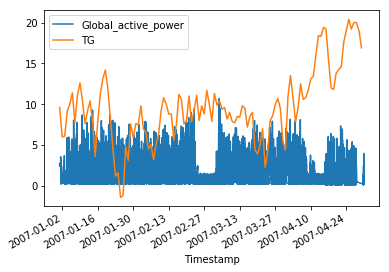

In [11]:
df.loc["2007-01-01 00:00:00": "2007-04-30 23:59:59",
       "Global_active_power"].plot(legend=True)
df2.loc["2007-01-01": "2007-04-30", "TG"].plot(legend=True)


<h1> EXERCICE II - Analysis of the auto-mpg dataset </h1>

<h3> Question 2_8: Import the dataset </h3>


Import the dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/ auto-mpg/auto-mpg.data-original with Pandas.
Add columns name using the option 'name' de read_csv and consulting : https://archive.ics.uci.edu/ml/machine-learning-databases/ auto-mpg/auto-mpg.names.
You can check the impact of using sep=r"\s+".
Is there a marker for missing values in this dataset ? If needed remove the corresponding lines.

In [12]:
# download part if needed.
filename = "auto-mpg.data-original"
Location = u'https://archive.ics.uci.edu/ml/machine-learning-databases/ \
             auto-mpg/'
Location += filename

# testing existence of file:
if sys.version_info >= (3, 0):
    if not(path.isfile(filename)):
        urllib.request.urlretrieve(Location, filename)
else:
    if not(path.isfile(filename)):
        urllib.urlretrieve(Location, filename)

# Detect and count lines with missing values.
na_values = ["NA"]
df3 = pd.read_csv(filename, sep=r"\s+", nrows=398,
                  na_values=na_values,
                  names=["mpg", "cylinders", "displacement",
                         "horsepower", "weight", "acceleration",
                         "model_year", "origin", "car_name"])
# Removing NaN
df3 = df3.dropna(how='any')


 <h3> Question 2_9: Encode </h3>
 
 Encode the three origins ('origin' feature) with meaningful labels such that 1 stands for USA, 2
for Europe and 3 for Japan .

In [13]:
# function to encode number to Countries
def encode(name):
    if name == 1.0:
        return "USA"
    elif name == 2.0:
        return "Europe"
    elif name == 3.0:
        return "Japan"

df3['origin'] = df3['origin'].apply(encode)


<h3> Question 2_10: least-squares estimator </h3>

Get the least-squares estimator θˆ (with intercept) the prediction vector yˆ considering only the 9
 first line of the dataset.
 
What do you observe (in particular for `cylinders` and `model year`) ?.

In [14]:
# least-squares estimator
form = "mpg ~ cylinders + displacement + horsepower + \
        weight + acceleration + model_year"
limitLine = 9
result = sm.ols(formula=form, data=df3.loc[:limitLine]).fit()
result.summary()


/Users/famat/pythonEnv/lib/python2.7/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     7.469
Date:                Wed, 06 Dec 2017   Prob (F-statistic):             0.0244
Time:                        21:53:24   Log-Likelihood:                -8.5100
No. Observations:                  10   AIC:                             27.02
Df Residuals:                       5   BIC:                             28.53
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0052      0.001      3.834      0.012       0.002       0.009
cylinders        0.0415      0.011      3.834      0.012       0.014       0.069
displacement     0.0377      0.055      0.680      0.527      -0.105       0.180
horsepower      -0.0867      0.050     -1.719      0.146      -0.216       0.043
weight          -0.0021      0.005     -0.398      0.707      -0.016       0.011
acceleration    -0.0680      0.369     -0.185      0.861      -1.015       0.879
model_year       0.3631      0.095      3.834      0.012       0.120       0.606
==============================================================================
Omnibus:                        2.589   Durbin-Watson:                   3.167
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                0.332
Skew:                           0.259   Prob(JB):                        0.847
Kurtosis:                       3.727   Cond. No.                     4.27e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.44e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
print("theta",result.params)


('theta', Intercept       0.005187
cylinders       0.041494
displacement    0.037682
horsepower     -0.086668
weight         -0.002094
acceleration   -0.068038
model_year      0.363071
dtype: float64)


We observe that for  `cylinders` and `model year` t is very high and P>|t| is low.
We can conclude only  `cylinders` and `model year` are useful to predict the `mpg`.

<h3> Question 2_11: least-squares estimator </h3>

Now, get the least-squares estimator θˆ and the prediction vector yˆ (with intercept) over the whole dataset, after performing scaling/centering (the columns must have unit standard deviation and be zero mean).

Which variables seem to best explain gasoline consumption according to your model ?

In [16]:
def scaleAndCenter(attributeName, df):
    for attribute in attributeName:
        df[attribute] = preprocessing.scale(df[attribute])

NAMES = ["mpg", "cylinders", "displacement", "horsepower", "weight",
         "acceleration", "model_year"]
df4 = df3.copy()
scaleAndCenter(NAMES, df4)
form = "mpg ~ cylinders + displacement + horsepower + \
        weight + acceleration + model_year"
limitLine = 9
result = sm.ols(formula=form, data=df4).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     264.6
Date:                Wed, 06 Dec 2017   Prob (F-statistic):          8.53e-132
Time:                        21:53:24   Log-Likelihood:                -227.92
No. Observations:                 384   AIC:                             469.8
Df Residuals:                     377   BIC:                             497.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.474e-16      0.023   1.54e-14      1.000      -0.044       0.044
cylinders       -0.0746      0.074     -1.009      0.313      -0.220       0.071
displacement     0.0885      0.100      0.885      0.377      -0.108       0.285
horsepower      -0.0177      0.069     -0.255      0.799      -0.154       0.119
weight          -0.7252      0.074     -9.761      0.000      -0.871      -0.579
acceleration     0.0131      0.037      0.354      0.723      -0.060       0.086
model_year       0.3457      0.025     13.792      0.000       0.296       0.395
==============================================================================
Omnibus:                       39.990   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.257
Skew:                           0.648   Prob(JB):                     2.49e-15
Kurtosis:                       4.588   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The variables that seem to best explain gasoline consumption  in my model are the `model_year`  and  the `weight` because of their high `t`.

In [17]:
print("theta", result.params)


('theta', Intercept       3.473784e-16
cylinders      -7.461851e-02
displacement    8.845813e-02
horsepower     -1.771125e-02
weight         -7.252306e-01
acceleration    1.311494e-02
model_year      3.457150e-01
dtype: float64)


In [18]:
print("estimator of Y:", result.fittedvalues)


('estimator of Y:', 0     -1.043969
1     -1.186704
2     -0.990967
3     -0.995377
4     -1.013293
5     -1.692753
6     -1.697660
7     -1.673899
8     -1.754568
9     -1.312266
15    -1.058094
16    -1.138383
18    -1.205144
19    -0.617746
20    -0.040828
21    -0.445688
22    -0.395671
23    -0.228157
24     0.151969
25     0.450595
26    -0.282336
27    -0.095238
28    -0.038894
29     0.062766
30    -0.287900
31    -1.971933
32    -1.801913
33    -1.809566
34    -2.086602
35     0.247682
         ...   
366    0.340031
368    0.313418
369    0.501435
370    0.461409
371    0.135371
372   -0.097379
373    0.427037
374    0.103184
375    0.934455
376    0.899919
377    1.105033
378    0.944909
379    1.006202
380    0.848263
381    0.720008
383    1.444880
384    1.411628
385    1.455430
386    1.323921
387    1.327360
388    1.294407
389    1.251221
390    1.231963
391    1.447599
392    1.450973
393    1.427914
394    0.590948
395    0.614005
396    0.962031
397    0.718130
Leng

<h3> Question 2_12:  the square norm of the residual vector </h3>

In [19]:
residNorm = np.linalg.norm(result.resid)
yBar = df3['mpg'].mean()
leftTerm = np.linalg.norm(df3['mpg'].apply(lambda x: x-yBar))
rightTerm = np.linalg.norm(result.fittedvalues - yBar)
print(np.isclose(leftTerm**2, residNorm**2 + rightTerm**2))


False


<h3> Question 2_13: Prediction </h3>

In [20]:
NAMES = ["cylinders", "displacement", "horsepower",
         "weight", "acceleration", "model_year"]

df3.append(pd.DataFrame({"cylinders": [6],
                         "displacement": [225],
                         "horsepower": [100],
                         "weight": [3233],
                         "acceleration": [15.4],
                         "model_year": [2017]}))
result = sm.ols(formula=form, data=df3).fit()
result.fittedvalues[397]


28.820102996733194